In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
#Column 0 has the indices
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

In [6]:
import seaborn as sns
%matplotlib inline

/home/subhankar/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


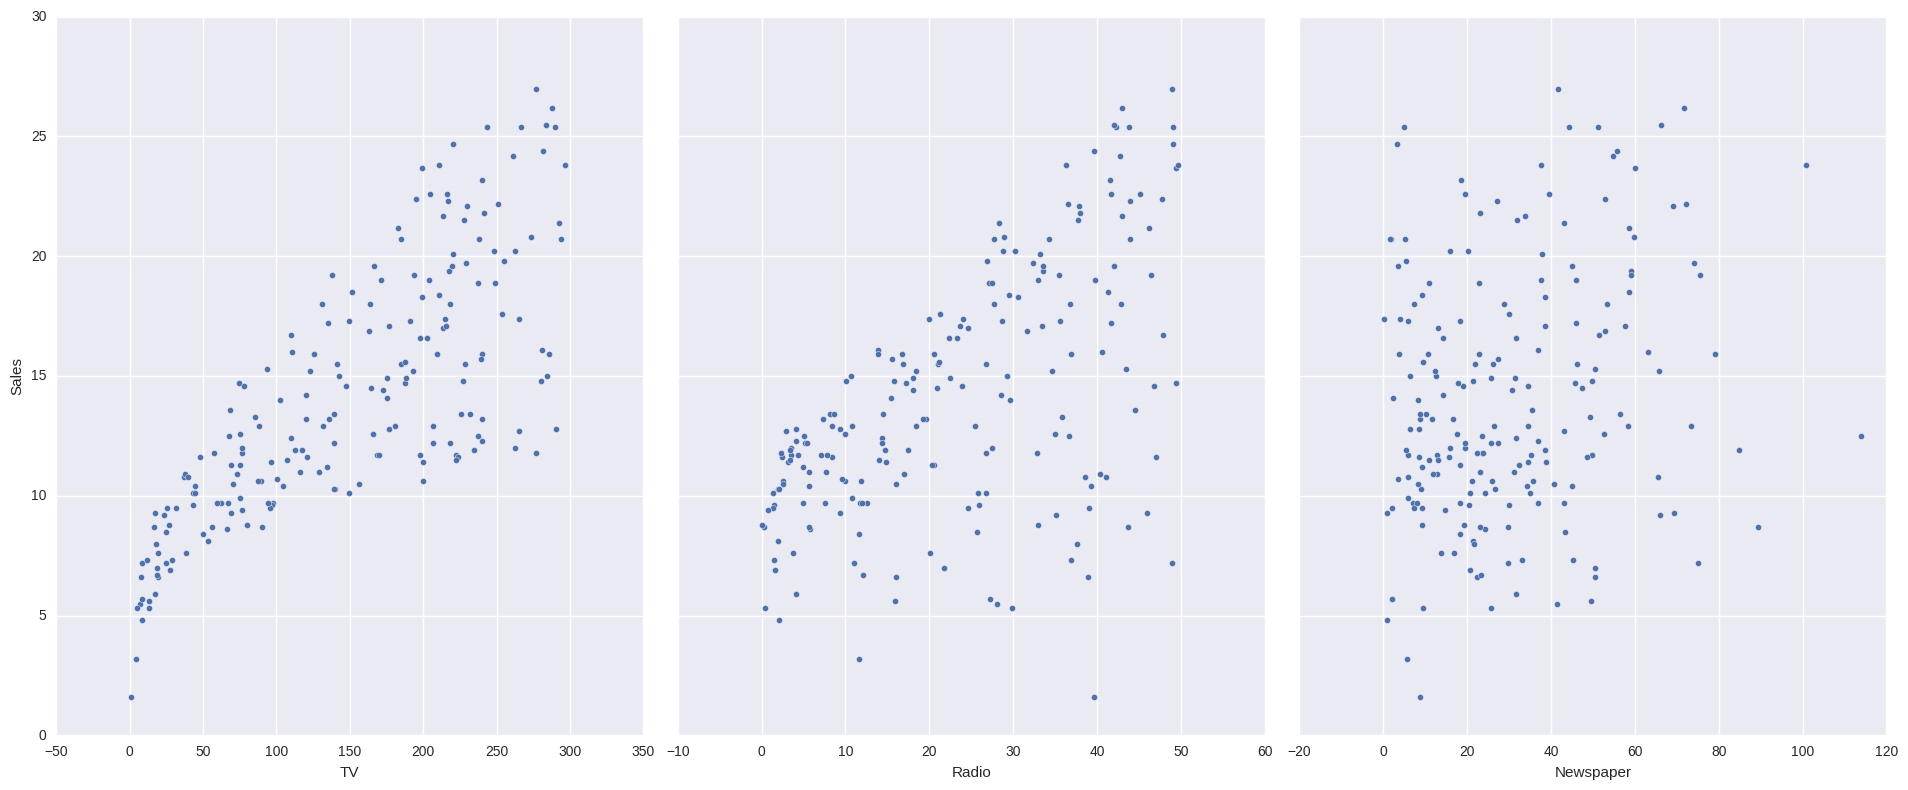

In [8]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], kind='scatter', size=8, aspect=0.8)

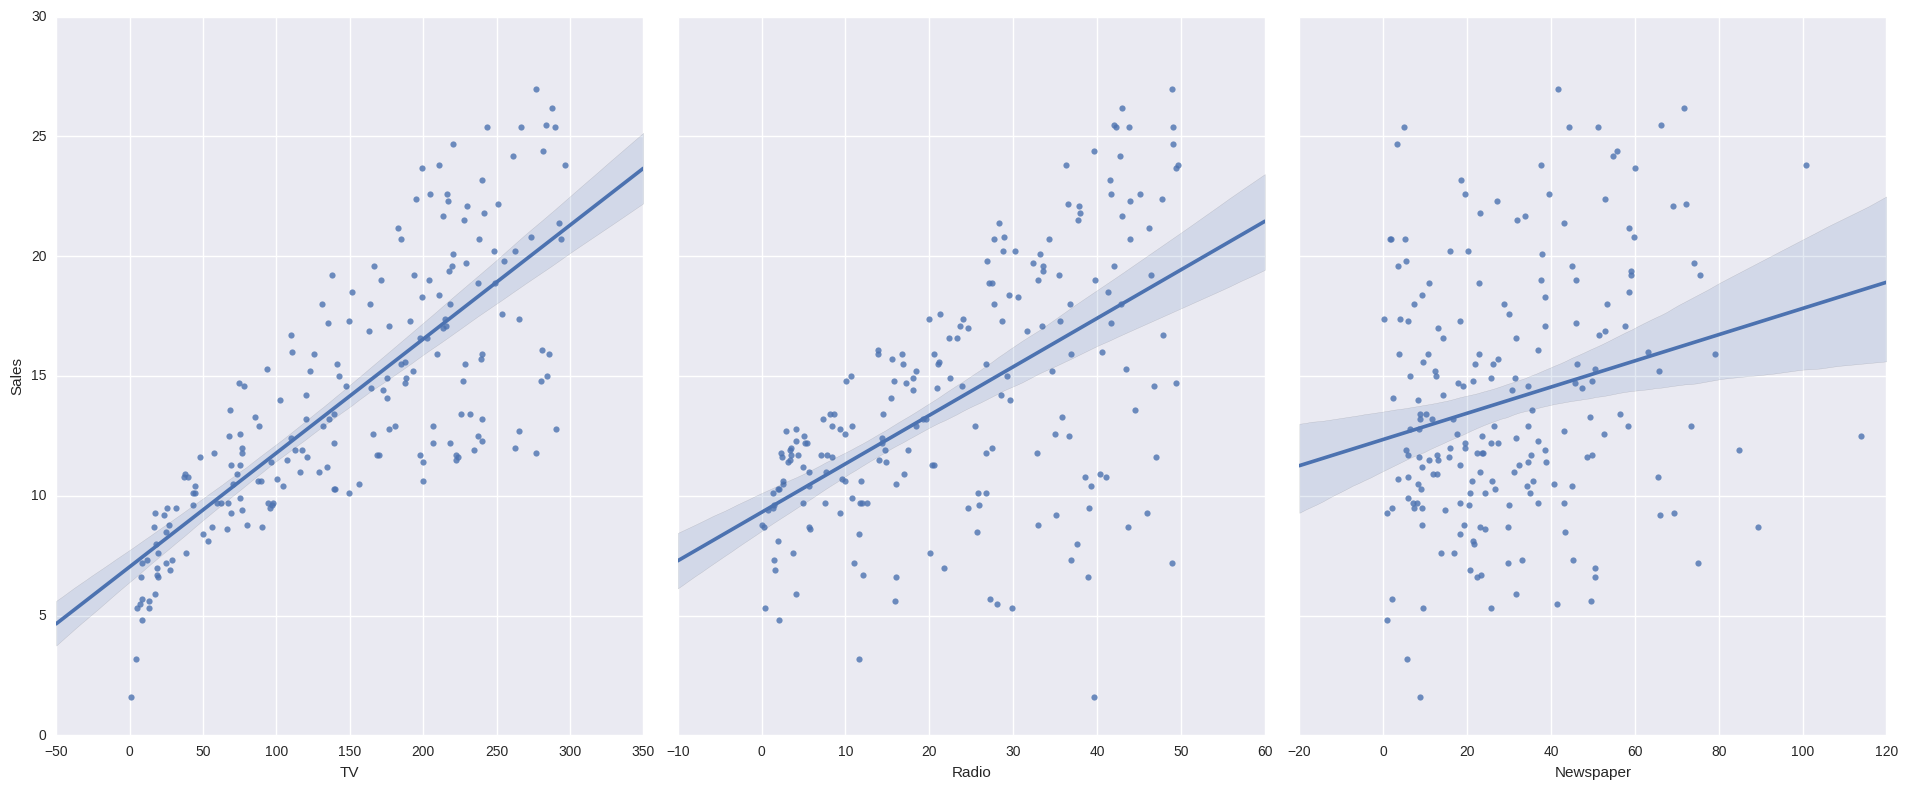

In [9]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], kind='reg', size=8, aspect=0.8)

In [11]:
x = data[['TV', 'Radio', 'Newspaper']]
#select a subset of the dataframe
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [13]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

/home/subhankar/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [21]:
list(zip(x, linreg.coef_))

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

In [22]:
y_pred = linreg.predict(x_test)

In [23]:
import numpy as np
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.06689170826
1.97304562023
1.40465142303


In [24]:
x = data[['TV', 'Radio']]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.04775904112
1.92627604187
1.38790346994
